In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# 파일 경로 지정
file_path = 'C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_minmax.csv'

# read_csv 메서드를 사용하여 CSV 파일을 데이터프레임으로 불러옴
df = pd.read_csv(file_path)

# 불러온 데이터프레임 확인
print(df.head())

        Age    Height    Weight   Bodyfat       DBP       SBP      Grip  \
0  0.043478  0.676471  0.909134  0.356713  0.250000  0.395604  0.968354   
1  0.347826  0.137255  0.052532  0.342685  0.392857  0.131868  0.409283   
2  0.565217  0.311275  0.255088  0.452906  0.428571  0.373626  0.358650   
3  0.304348  0.056373  0.574539  0.809619  0.571429  0.439560  0.327004   
4  0.478261  0.450980  0.548982  0.507014  0.553571  0.725275  0.767932   

   NormalGrip  sitreach      BMI  ...       TUG  8walktestsec  relativegrip  \
0    0.845371  0.615385  0.74375  ...  0.413897      0.500939      0.710167   
1    0.424212  0.457692  0.26250  ...  0.376133      0.432219      0.625190   
2    0.416073  0.636538  0.37500  ...  0.906344      0.737514      0.476480   
3    0.355036  0.692308  0.99375  ...  0.498489      0.609839      0.267071   
4    0.709054  0.490385  0.58125  ...  0.496979      0.549380      0.707132   

   Height_m  gender_numeric       ASM  ASM_by_Weight  ASM_by_Weight_perc  

In [3]:
df.columns

Index(['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'NormalGrip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'relativegrip', 'Height_m', 'gender_numeric', 'ASM',
       'ASM_by_Weight', 'ASM_by_Weight_perc', 'group', 'group_numberic'],
      dtype='object')

df 프레임에서 df2로 전환

In [3]:
df2 = df.drop(['group','ASM_by_Weight','ASM'], axis=1)

In [4]:
df2.columns

Index(['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'NormalGrip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'relativegrip', 'Height_m', 'gender_numeric',
       'ASM_by_Weight_perc', 'group_numberic'],
      dtype='object')

In [8]:
df_1=df2.loc[:,['ASM_by_Weight_perc']]
df_2=df2.loc[:,['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'gender_numeric']]

In [9]:
# Define new labels for the variables in df_1 and df_2
# Update these labels as per your requirements
new_labels_df1 = {'ASM_by_Weight_perc': 'ASM/BW (%)'}
new_labels_df2 = {
    'BMI': 'BMI (kg/m\u00B2)',
    'Bodyfat': 'Body Fat (%)',
    'Age': 'Age (years)',
    'SBP': 'Systolic Blood Pressure (mmHg)',
    'DBP': 'Diastolic Blood Pressure (mmHg)',
    'sitreach': 'Sit & Reach (cm)',
    'gender_numeric': 'Gender (M=0, F=1)',
    'Height': 'Height (cm)',
    'Weight': 'Weight (kg)',  # Here was the missing comma
    'Grip': 'Grip (kg)',
    '2minstepcount': '2-Minute Step (Count)',
    'sitstand': 'Sit & Stand (Count)',
    'TUG': 'Timed Up & Go (sec)',
    '8walktestsec': '8-Meter Walk (sec)',
}

# Rename the columns of df_1 and df_2
df_1_renamed = df_1.rename(columns=new_labels_df1)
df_2_renamed = df_2.rename(columns=new_labels_df2)

# Concatenate the renamed df_1 and df_2
df_combined = pd.concat([df_1_renamed, df_2_renamed], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Print the Pearson correlation values
print(correlation_matrix)


                                 ASM/BW (%)  Age (years)  Height (cm)  \
ASM/BW (%)                         1.000000     0.107980     0.706957   
Age (years)                        0.107980     1.000000    -0.021777   
Height (cm)                        0.706957    -0.021777     1.000000   
Weight (kg)                        0.034847    -0.043538     0.436784   
Body Fat (%)                      -0.765348    -0.013772    -0.593907   
Diastolic Blood Pressure (mmHg)    0.001345    -0.125331     0.029129   
Systolic Blood Pressure (mmHg)     0.084029     0.085869     0.066336   
Grip (kg)                          0.633526    -0.086172     0.627637   
Sit & Reach (cm)                  -0.396029    -0.249980    -0.282378   
BMI (kg/m²)                       -0.515357    -0.026915    -0.322863   
Sit & Stand (Count)                0.251974    -0.203688     0.176151   
2-Minute Step (Count)              0.132863    -0.209530     0.144818   
Timed Up & Go (sec)               -0.247258     0.2

C:\Users\Jun-Hyun Bae\AppData\Local\Temp\ipykernel_20016\2442335898.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_yticklabels(cbar.get_yticklabels(), fontweight='bold')


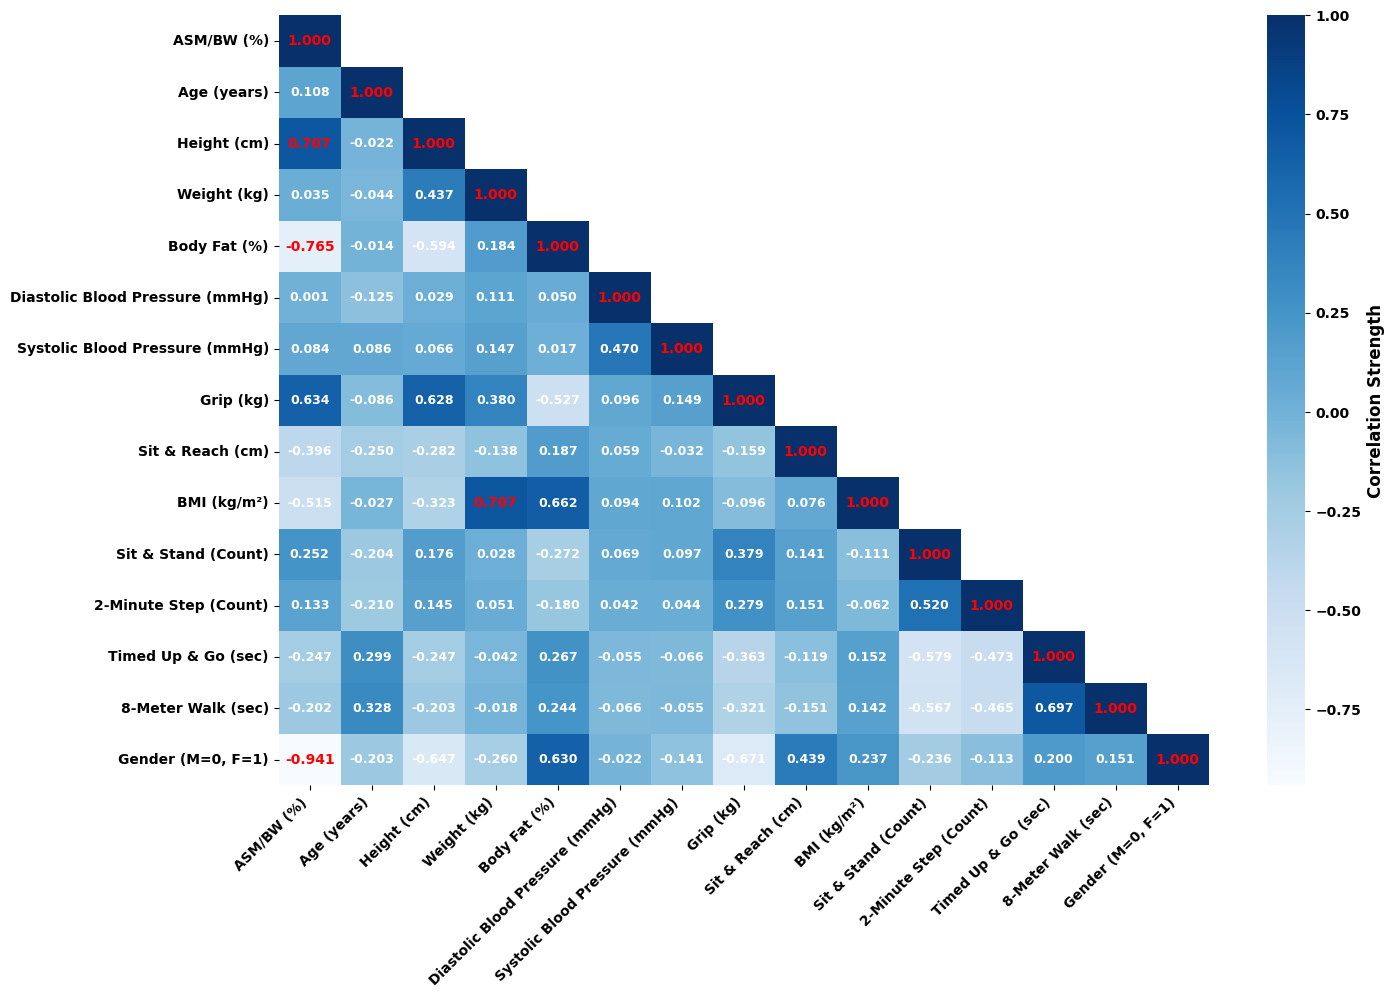

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 상관계수 행렬을 그리기 위한 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# 히트맵 사이즈 설정
plt.figure(figsize=(15, 10))

# 상관계수 행렬 히트맵 그리기
#sns.heatmap(correlation_matrix, fmt=".3f", cmap='Blues', mask=mask, cbar_kws={'label': 'Correlation Strength', 'pad': 0.01})
ax = sns.heatmap(correlation_matrix, fmt=".3f", cmap='Blues', mask=mask,
                 cbar_kws={'label': 'Correlation Strength'})
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Strength', weight='bold', fontsize=12)

# 타이틀 및 라벨 설정
#plt.title('Correlation Matrix with Renamed Variables', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')

# 모든 셀에 대해 개별적으로 주석 추가
for y in range(correlation_matrix.shape[0]):
    for x in range(correlation_matrix.shape[1]):
        if mask[y, x]:
            continue
        value = correlation_matrix.iloc[y, x]
        if abs(value) >= 0.70:
            # 절대값이 0.70 이상인 경우 파란색으로 강조하고 큰 폰트 크기로 표시
            plt.text(x + 0.5, y + 0.5, f'{value:.3f}',
                     horizontalalignment='center', verticalalignment='center',
                     color='red', weight='bold', fontsize=10)
        else:
            # 절대값이 0.70 미만인 경우 흰색으로 표시하고 작은 폰트 크기로 표시
            plt.text(x + 0.5, y + 0.5, f'{value:.3f}',
                     horizontalalignment='center', verticalalignment='center',
                     color='white', weight='bold', fontsize=9)

# 오른쪽 라벨(컬러바 라벨) 굵은 글씨로 설정
cbar = plt.gcf().axes[-1]
cbar.set_yticklabels(cbar.get_yticklabels(), fontweight='bold')

plt.show()


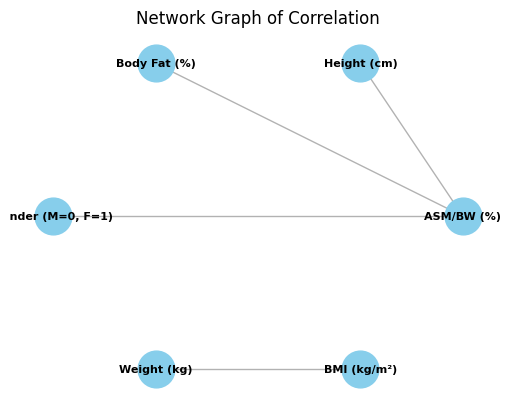

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 새로운 레이블로 데이터프레임의 열 이름 업데이트
df_1_renamed = df_1.rename(columns=new_labels_df1)
df_2_renamed = df_2.rename(columns=new_labels_df2)

# 업데이트된 데이터프레임을 결합
df_combined = pd.concat([df_1_renamed, df_2_renamed], axis=1)

# 결합된 데이터프레임으로부터 상관계수 행렬 계산
correlation_matrix = df_combined.corr().abs()

# 상관계수 행렬을 스택하여 'var1', 'var2', 'value' 컬럼을 가진 DataFrame 생성
links = correlation_matrix.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# 상관계수가 특정 임계값(threshold) 이상이고 var1이 var2와 다른 경우만 필터링
threshold = 0.7
links_filtered = links.loc[(links['value'] > threshold) & (links['var1'] != links['var2'])]

# 네트워크 그래프 객체 생성
G = nx.Graph()

# 노드와 엣지(노드 간의 관계) 추가
for index, row in links_filtered.iterrows():
    G.add_edge(row['var1'], row['var2'], weight=row['value'])

# 네트워크 그래프 그리기
pos = nx.circular_layout(G)
edges = nx.draw_networkx_edges(G, pos, alpha=0.3, width=1)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
plt.title('Network Graph of Correlation')
plt.axis('off')  # 축을 표시하지 않음
plt.show()


